# Description

This notebook is part of an assignment made during the subject of Computational Intelligence, 7th semester at Federal University of Pará.

Professor: Aldebaro Klautau

Authors:

    - Bruno Martins
    - Claudio Matheus

## Packages

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

## Assure the libraries have the same version as used throughout the code

In [2]:
assert mpl.__version__ == '3.5.3'
assert pd.__version__ == '1.3.5'
assert np.__version__ == '1.19.5'

## Read dataset

In [3]:
DATASET_ROOT_PATH = './datasets/svm_homework/'

VALIDATION_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_validation.txt')
TRAIN_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_train.txt')
TEST_PATH = os.path.join(DATASET_ROOT_PATH, 'dataset_test.txt')

In [4]:
validation = pd.read_csv(VALIDATION_PATH, header=None)
train = pd.read_csv(TRAIN_PATH, header=None)
test = pd.read_csv(TEST_PATH, header=None)

## Separate features from labels

In [5]:
X_train, X_test, X_val = train.iloc[:, :-1], test.iloc[:, :-1], validation.iloc[:, :-1]
y_train, y_test, y_val = train.iloc[:, -1], test.iloc[:, -1], validation.iloc[:, -1]

## First Question

### Item (A):


LinearSVC = 1 error
SVC with linear kernel = 1 errors
SVC with RBF kernel = 0 errors
SVC with polynomial = 0 errors

### Item (B):

The top-right SVM looks the best. Although it has an error, the classes are in general more splitted apart in terms of margin compared to the other models. This will make the model less susceptible to outliers and noisy data.

## Second Question

In sckit-learn there is a hyperparameter that crontols the quantities of support vectors of a model. This parameter is called C. Therefore, it works in this way: if C is substantially a high value, then, the numbers of support vectors will be smaller. Alternatively, if C is considerably a low value, then, the quantities of support vectors will be huge.

![SVM_C_values](https://raw.githubusercontent.com/Euronym/computational_intelligence_2022/main/images/C_values_SVM.png)

In the words, the width of the way between the convex-hull and the hyperplan of the model will be minor for the high value of C, and larger for the low value of C. Provoking, respectively, a decrease of support vectors and an increase of them.

## Third Question

A prediction using A SVM is made using the formula:


$ f(z) = \left(\sum\limits_{n = 0}^{N - 1}\lambda_{n}K(z,x_{n}) \right) + b $

For a perceptron, the decision function can be written as:
     
$f(z) = sgn(<w, x> + b)$

The Cost $C$ is defined as:

$ C = n_{mult} + n_{sum}$

With $C_{original} = N * (2K - 1) $. Assuming there are 450 support vectors, the first equation will give a zero $\lambda$ for most of the training examples. Thus, we don't need to keep many of the examples, only the support vectors.

A perceptron doesn't hold the training data and thus doesn't depend on the number of lambdas. Hence, it's cost is given by:

$C_{perceptron} = 2K - 1$

The total cost is:


$F = \dfrac{N * (2K - 1)}{(2K - 1)}$

$F = N$

## Fourth Question

svm.n_support_= [1 2]

svm.support_vectors_= [[ 1. 4.] [-2.  3.] [-2. -5.]]

svm.dual_coef_= [[-0.5 -0.3 0.8]]

svc.intercept_= [-2]

### Item (A):
Considering these attributes above, there is below the decision model:

$f(z) = -0.5 \times <z, [1, 4]>  -0.3 \times <z, [-2, 3]> + 0.8 \times <z, [1, 4]> -2$


### Item (B):
For a SVM as a perceptron it's quite similar to the previous models, nevertheless, there is important difference, as we'll see in the next:

First of all, it's known that weight $w$ of perceptron defintion ($f(z)= <z, w> + b$) is defined by:

$w = \displaystyle\sum_{i = 0}^{N-1}\lambda_{n} x_i$

where $\lambda$ in sckit-learn API is identified by a variable called *dual_coef_*.

Therefore, using the general definition of SVM and the associative property of dot product, there is the development of definition of SVM as a perceptron:

$f(z) = \displaystyle\sum_{i = 0}^{N-1}\lambda_{n}K(z, x_n) + b$

- Assuming that is a linear kernel:

$f(z) = \displaystyle\sum_{i = 0}^{N-1}\lambda_{n}<z, x_n> + b$

- And finally, using associative property of dot product:

$f(z) = \displaystyle\sum_{i = 0}^{N-1}<z, \lambda_{n}x_n> + b$

$f(z) = \displaystyle\sum_{i = 0}^{N-1}<z, w> + b$

Now, applying this definition for the SVM in this problem, we have the final result:

$f(z) = <z, [-0.5, 2]> + <z, [0.6, 0.9]> + <z, [-1.6, -4]> -2$

### item (C):
First of all considering $I(f(z))$ "indicative" function, where is defined like this:

$I(f(z))=\begin{cases}
    1, & f(z) > 0\\
    0, & \text{otherwise}.
  \end{cases}$

So, evaluate $f(z)$ for $z = [0, 0]$, we have this:

$f([0, 0]) = -0.5 \times <[0, 0], [1, 4]>  -0.3 \times <[0, 0], [-2, 3]> + 0.8 \times <[0, 0], [1, 4]> -2$

It's quite clear that dot product between a vector at origin and any other vector result in value 0. Therefore, the result of these three dot product is 0. So:

$f([0, 0]) = 0 - 2$

$f([0, 0]) = -2$

Using this result in "indicative" function, we have this:

$I(f([0, 0])) = 0$

## Fifth Question

The general equation is given by:

$f(z) = \left(\sum\limits_{n = 0}^{N - 1}\lambda_{n}K(z,x_{n}) \right) + b$

#### Item (A):

First of all, it's important to write the correct formula for the kernels. 
Those are given by:

Poly:

$ K(z,x_{n}) = <z, x_{n}>^{p}$, p = 3

RBF:

$K(z,x_{n}) = e^{- \dfrac{||z - x_{n}||^{2}}{2\sigma^{2}}} $, $\sigma = 1$

For the 3th case we have:

$b = -0.08 \\ $ 

$\lambda \in \left[-0.917,-0.913, -0.913, 0.871, 0.871, 1\right] \\ $ 

$x \in \left[(0, -4), (-1, 2), (3, 3), (-5, -6), (-4, -5), (-2, -2)\right]$

$N = 6$ 

Hence, the decision function is given by:

$f(z) = \left(\lambda_{0}<z, (\alpha_{0}, \beta_{0})>^3 + \lambda_{1}<z, (\alpha_{1}, \beta_{1})>^3 + \lambda_{2}<z, (\alpha_{2}, \beta_{2})>^3 + \lambda_{3}<z, (\alpha_{3}, \beta_{3})>^3 + \lambda_{4}<z, (\alpha_{4}, \beta_{4})>^3 + \lambda_{5}<z, (\alpha_{5}, \beta_{5})>^3 \right) - 0.08$

$f(z) = \left(-0.917<z, (0, -4)>^3 - 0.913<z, (-1, 2)>^3 - 0.913<z, (3, 3)>^3 + 0.871 <z, (-5, -6)>^3 +  0.871<z, (-4, -5)>^3 + <z, (-2, -2)>^3 \right) - 0.08$

For the 4th case:

$b = -1.79 $

$\lambda \in \left[-0.45, -0.27, 0.73\right]  $

$x \in \left[(0, -4), (-1, 2), (-2, -2)\right]$

$N = 3$


$f(z) = \left(-0.45 e^{- \dfrac{||z - (0, -4)||}{2}^{2}} - 0.27 e^{- \dfrac{||z - (-1, 2)||}{2}^{2}} + 0.73 e^{- \dfrac{||z - (-2, -2)||}{2}^{2}} \right) - 1.79$

For the linear case, $k(z, x_{n}) = <z, x_{n}>$

And,

$b = -1.79 $

$\lambda \in \left[-0.45, -0.279,  0.73\right] $

$x \in \left[(0, -4), (-1, 2), (-2, -2)\right]$

$N = 3$

Hence,

$f(z) = \left(-0.45<z, (0, -4)> - 0.27<z, (-1, 2)> + 0.73<z, (-2, -2)> \right) - 1.79 $

#### Item (B):

Originally, the function is given by:

$f(z) = \left(\sum\limits_{n = 0}^{N - 1}\lambda_{n}<z,x_{n}> \right) + b$

Where:

$w = \sum\limits_{n = 0}^{N - 1}\lambda_{n}x_{n}$

#### Item (C):

#### Item (D):

##### subitem (D1):

##### subitem (D2):

##### subitem (D3):

#### Item (E):

## Sixth Question

In [10]:
## Method obtained by Ageron's github repository
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


(-2.0, 2.0, -2.0, 2.0)

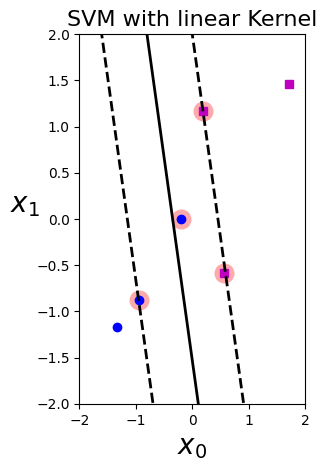

In [11]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

## Preprocessing the train and test dataset w/ standard scaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

# Train the model
svc = svm.SVC(kernel ='linear', C = 1).fit(X_scaled_train, y_train)

# Plot the chart
plt.subplot(122)
plt.plot(X_scaled_train[:, 0][y_train==1], X_scaled_train[:, 1][y_train==1], "bo")
plt.plot(X_scaled_train[:, 0][y_train==0], X_scaled_train[:, 1][y_train==0], "ms")
plot_svc_decision_boundary(svc, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("SVM with linear Kernel", fontsize=16)
plt.axis([-2, 2, -2, 2])

Some information about the model

In [12]:
print(f'Number of Support Vectors: {svc.n_support_}')
print(f'Support Vectors Index: {svc.support_}')
print(f'Support Vectors: \n{svc.support_vectors_}')

Number of Support Vectors: [2 2]
Support Vectors Index: [0 1 4 5]
Support Vectors: 
[[ 0.57035183 -0.58554004]
 [ 0.19011728  1.17108009]
 [-0.95058638 -0.87831007]
 [-0.19011728  0.        ]]


Results in test dataset

In [13]:
## get the labels
y = np.ravel(test[2],order='C')
print(f'\n\nLabels: {y}\nPredict: {svc.predict(X_scaled_test)}')



Labels: [0 0 1 1]
Predict: [0 0 1 1]


## Seventh Question

In [23]:
from sklearn import svm, datasets

In [24]:
def load_iris_first_2_features_and_binary():
    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target
    #make it only two classes:
    #y = np.array(iris.target < 1).astype(int) #this is an easier binary problem
    y = np.array(iris.target > 1).astype(int) #this is a harder binary problem
    feature_names = ('Sepal length', 'Sepal width') #x and y
    return X,y,feature_names

In [25]:
def load_lista1_dataset():
    #from numpy import genfromtxt
    my_data = np.genfromtxt('lista1_dataset.csv', delimiter=',')
    X = my_data[:,:2] # two first parameters are input vector
    #y = my_data[:,2:]
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    feature_names = ('x0', 'x1') #x and y
    return X,y,feature_names

In [26]:
def load_simple():
    #from numpy import genfromtxt
    my_data = np.genfromtxt('simple.csv', delimiter=',')
    X = my_data[:,:2] # fish length and weight
    y = np.ravel(my_data[:,2:],order='C') #convert column vector into 1D array
    feature_names = ('Length', 'Weight') #x and y
    return X,y,feature_names

In [27]:
def convert_linear_SVM_to_perceptron(support_vectors, dual_coef):
    dual_coef = np.ravel(dual_coef,order='C') #convert to a 1D vector
    num_support_vectors = len(dual_coef)
    if support_vectors.shape[0] != num_support_vectors:
        raise Exception('support_vectors.shape[0] != num_support_vectors')
    input_space_dimension = support_vectors.shape[1]
    perceptron_weights = np.zeros((input_space_dimension))
    for sv in range(num_support_vectors):
        perceptron_weights += dual_coef[sv] * support_vectors[sv]
    return perceptron_weights

In [28]:
def calculate_intercept(perceptron_weights,support_vectors,support_vector_indices,labels):
    '''
    https://stats.stackexchange.com/questions/211310/deriving-the-intercept-term-in-a-linearly-separable-and-soft-margin-svm
    '''
    num_support_vectors = support_vectors.shape[0]
    #input_space_dimension = support_vectors.shape[1]
    max_negative = -1e30
    min_positive = 1e30
    for i in range(num_support_vectors):
        #note that labels has all training examples, not only support vectors,
        #so use support_vector_indices to get the proper index in training set
        this_label = labels[support_vector_indices[i]]
        this_inner_product = np.inner(perceptron_weights, support_vectors[i])
        if this_label > 0:
            if this_inner_product < min_positive:
                min_positive = this_inner_product
        else:
            if this_inner_product > max_negative:
                max_negative = this_inner_product
    return -(max_negative+min_positive)/2.0

In [29]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [30]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#### 1) Linear SVM with LinearSVC #####
linear_svc.coef_= [[ 0.66001144 -0.34870356]]
linear_svc.intercept_= [-3.13919621]
[LibSVM]*
optimization finished, #iter = 69
obj = -67.107474, rho = -11.356088
nSV = 71, nBSV = 68
Total nSV = 71


#### Generic SVMs with SVC #####
####  2 ) SVM with SVC ####
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': False, 'tol': 0.001, 'verbose': 1}
svm.n_support_= [36 35]
svm.support_= [ 14  15  50  51  52  54  55  56  58  61  62  63  65  67  68  70  71  72
  73  74  75  76  77  78  79  82  83  85  86  87  91  92  95  96  97  99
 100 101 103 104 106 108 110 111 112 113 114 115 116 119 121 123 124 126
 127 128 132 133 134 136 137 138 140 142 143 144 145 146 147 148 149]
svm.support_vectors_= [[5.8 4. ]
 [5.7 4.4]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [6.5 2.8]
 [5.

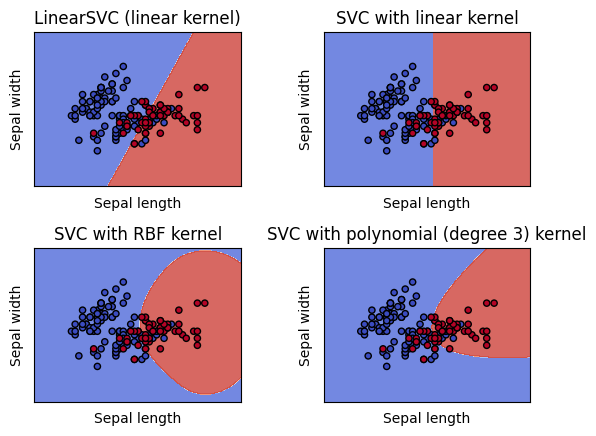

In [31]:
np.random.seed(30) #reproducible experiments

#Choose here the dataset:
# X,y,feature_names = load_simple()
#X,y,feature_names = load_lista1_dataset()
X,y,feature_names = load_iris_first_2_features_and_binary()

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

svc_with_linear_kernel = svm.SVC(kernel='linear', C=C, verbose=1, shrinking=False)
linear_svc = svm.LinearSVC(C=C, max_iter=1e4, dual=True, tol=1e-10)
rbf_svm = svm.SVC(kernel='rbf', gamma=0.7, C=C)
polynomial_svm = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C, coef0=0)

print('#### 1) Linear SVM with LinearSVC #####')
#This is restricted to linear SVMs. It does not return the support vectors but the primal perceptron
linear_svc.fit(X,y) #https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
print('linear_svc.coef_=',linear_svc.coef_)
print('linear_svc.intercept_=',linear_svc.intercept_)
#print(linear_svc.offset_)
svm_scores = np.zeros((4,))
svm_scores[0] = linear_svc.score(X,y)

#These are generic SVMs
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
svc_with_linear_kernel.fit(X,y)
rbf_svm.fit(X,y) 
polynomial_svm.fit(X,y)

tuple_of_svms = (svc_with_linear_kernel, rbf_svm, polynomial_svm)

print('\n\n#### Generic SVMs with SVC #####')
for i in range(3):
    svm = tuple_of_svms[i]
    print('#### ', str(i+2), ') SVM with SVC ####\n', svm.get_params())
    print('svm.n_support_=',svm.n_support_)
    print('svm.support_=',svm.support_)
    print('svm.support_vectors_=',svm.support_vectors_)
    print('svm.dual_coef_=',svm.dual_coef_)
    decisions = svm.decision_function(X)
    if len(decisions) > 10: #don't show too many numbers
        decisions = decisions[:10]
    print('At most 10 decisions: svm.decision_function(X)=',decisions)
    svm_scores[i+1] = svm.score(X,y)
    print('Accuracy via svm.score(X,y)=',svm_scores[i])
    if i == 0: #print(svm.coef_) #cannot be used with non-linear SVMs
        print('svc_with_linear_kernel.coef_=',svm.coef_)
        print('linear_svc.intercept_=',svm.intercept_)
        perceptron_weights = convert_linear_SVM_to_perceptron(svm.support_vectors_, svm.dual_coef_)
        print('Estimated perceptron_weights=', perceptron_weights)
        bias = calculate_intercept(perceptron_weights,svm.support_vectors_,svm.support_,y)
        print('Estimated bias=', bias)

#Plot:
models = (linear_svc, svc_with_linear_kernel, rbf_svm, polynomial_svm)

# title for the plots
titles = ('LinearSVC (linear kernel)',
        'SVC with linear kernel',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

print(titles,'have accuracies:')
print('svm_scores=',svm_scores)
plt.show()